<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Árboles de decisión</h1>
<br/><br/>
    <b>Instructor Principal:</b>  Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Árboles de decisión (Decision Trees)

- Versátil algoritmo de ML
- Puedes ser usado para clasificación y regresión
- Componente básica para los algoritmos de Bosques Aleatorios (Random Forest)

# Árboles de decisión (Decision Trees)

In [ ]:
# Ejemplo
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
vino = load_wine()
X = iris.data[:, 2: ] # Solo columnas de largo y ancho del pétalo
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


In [29]:
# Ejemplo
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 3: ] 
X1 =iris.data[:, 3: ] 
X= X & X1
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
X1

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [20]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(2232.0, 4530.0, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(1116.0, 2718.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(3348.0, 2718.0, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(2232.0, 906.0, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(4464.0, 906.0, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

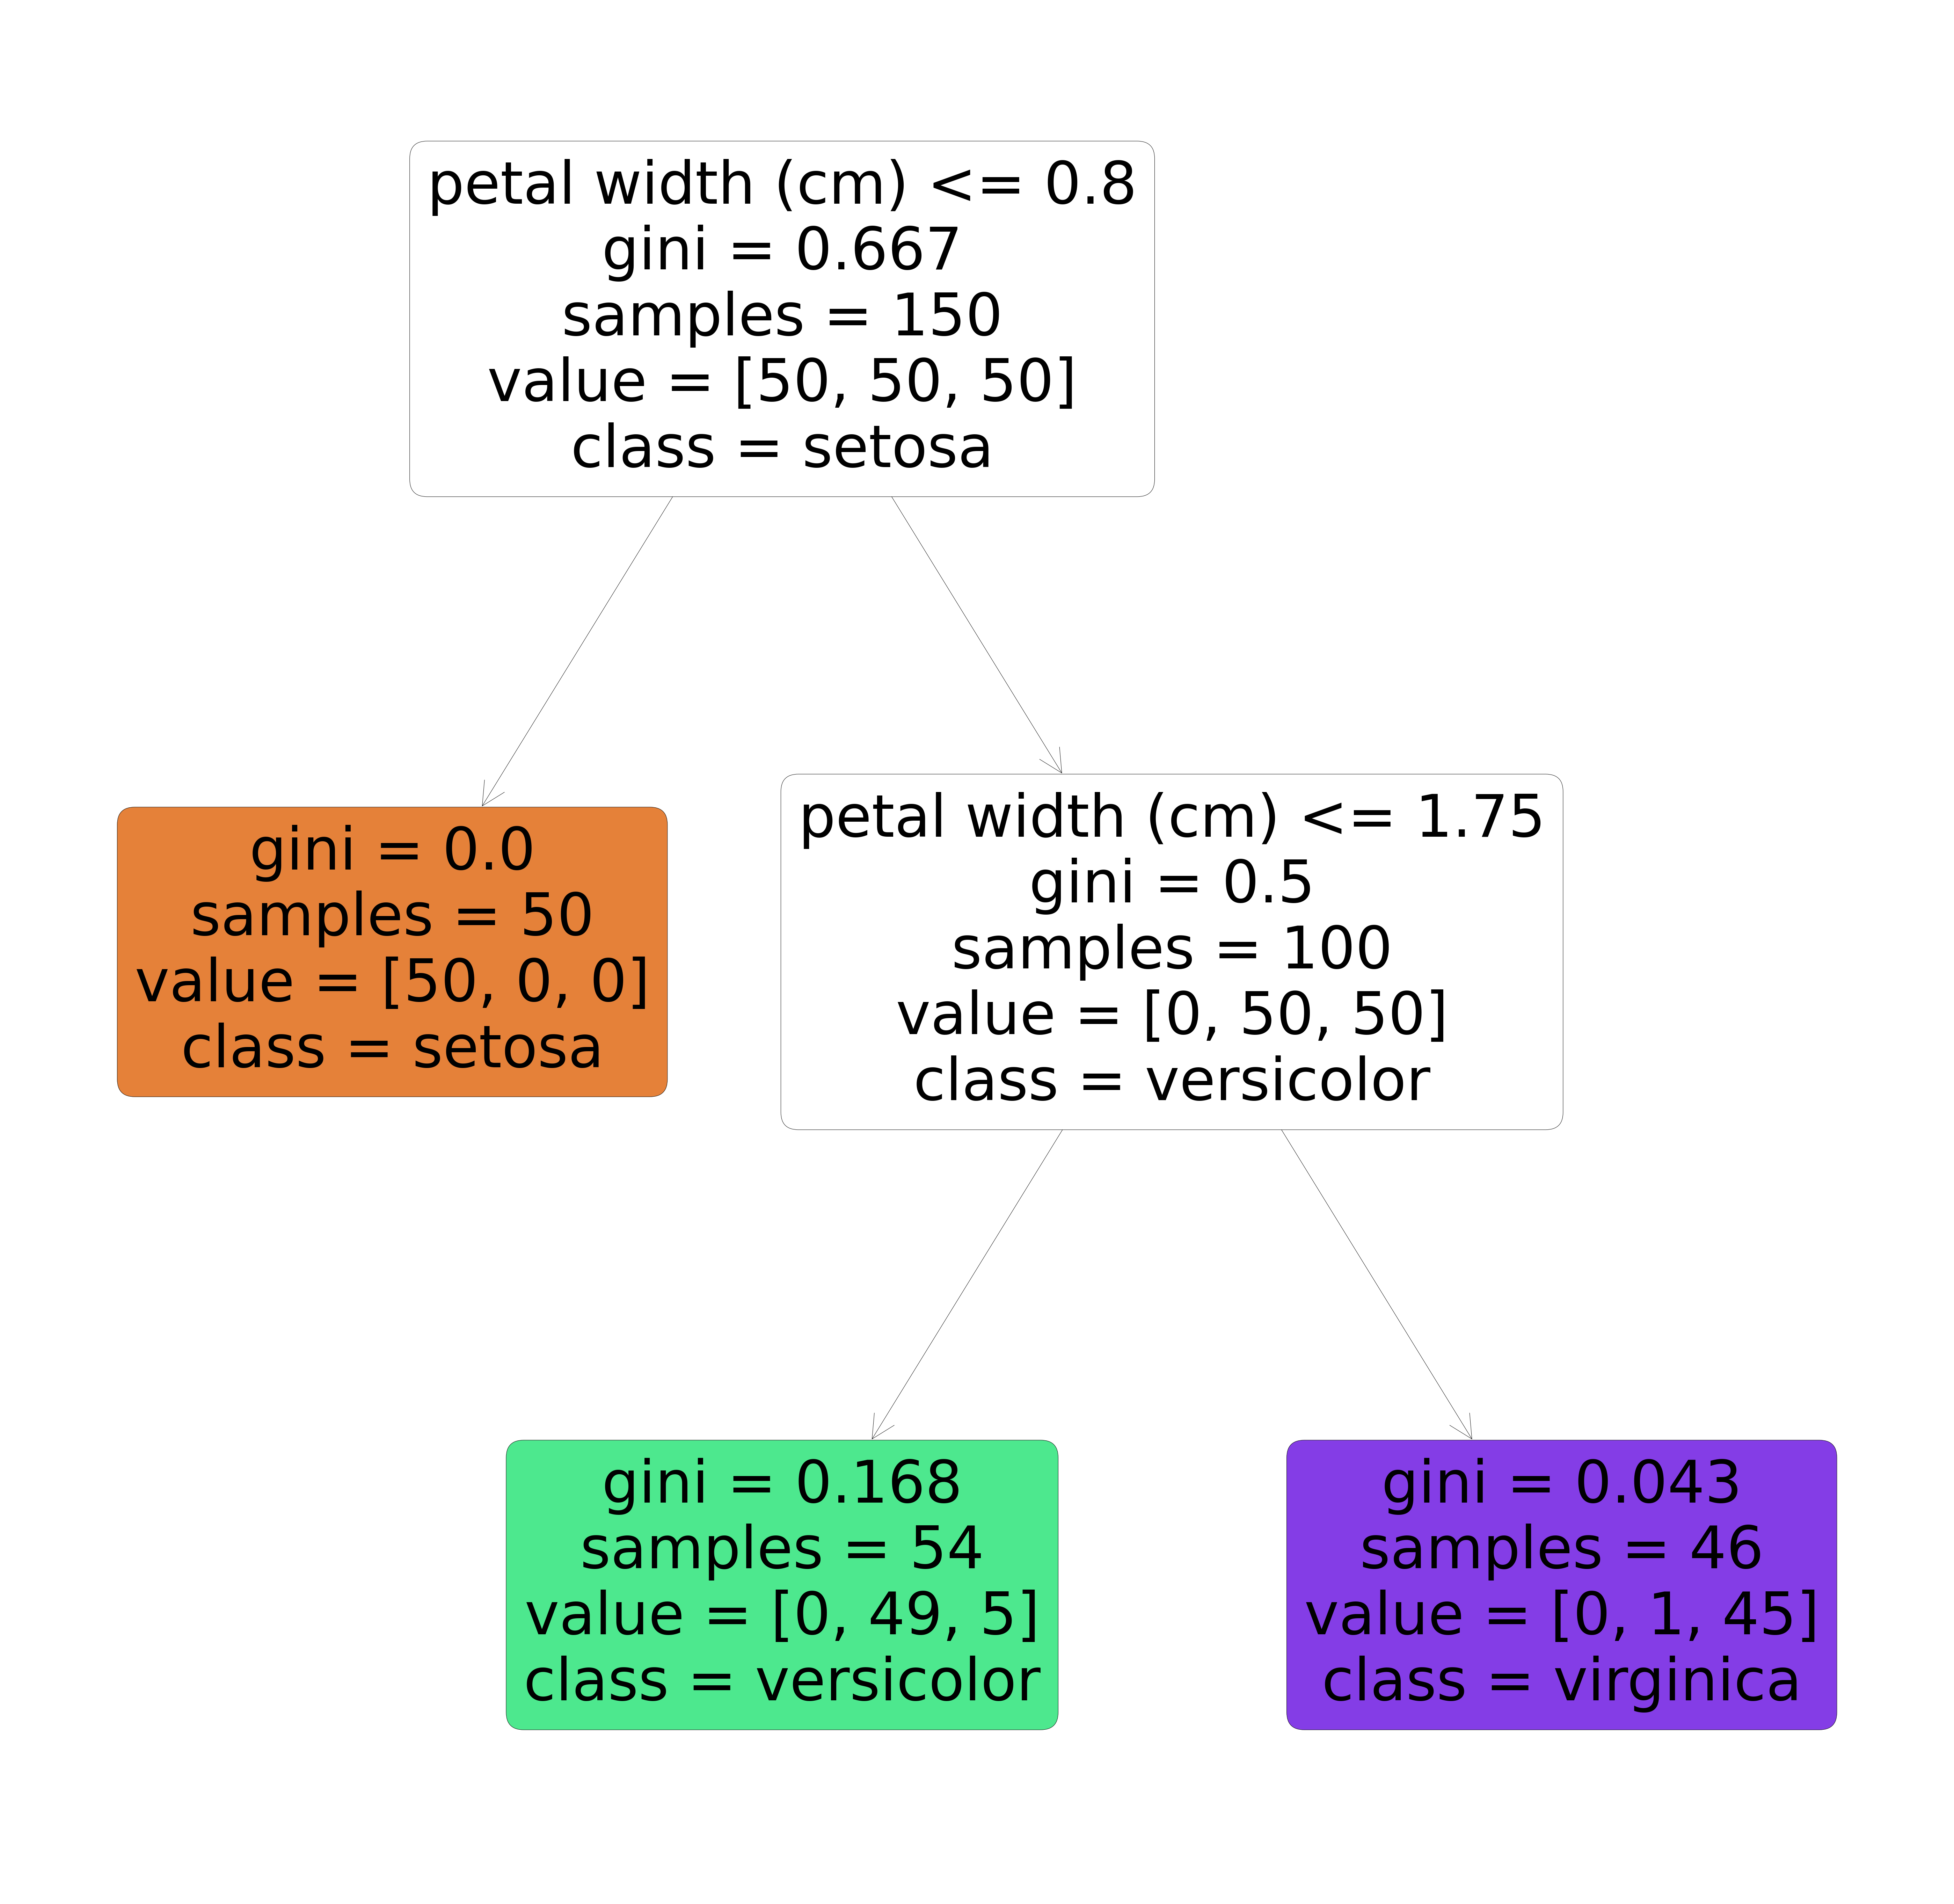

In [7]:
# Visualizando árbol de decisión
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

- **Samples**: Número de instancias de entrenamiento a los cuales se les aplica un cierto nodo
- **Value**: Número de instancias de entrenamiento de cada clase se les aplica un cierto nodo
- **Gini**: Medición de *impureza*. Si ```gini=0```, todas las instancias a las cuales el nodo aplica, pertenecen a la misma clase.

Ej. cálculo de Impureza Gini:

$$ G_i = 1 - \sum_{k=1}^n p_{i,k}^2 = 1 - \left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \approx 0.168$$

$p_{i,k}$ es la razón entre instancias de clase $k$ vs instancias del nodo $i$ (revisar *value*)

- A partir del árbol de decisión es posible obtener la probabilidad de que una nueva instancia pertenezca a una cierta clase.
- La nueva instancia pertenecerá a aquella clase con mayor probabilidad

In [15]:
# Nueva instancia
x_new = [[5, 1.5]]
# Probabilidades por cada clase
print(tree_clf.predict_proba(x_new))
# Clase predicha
print("Esta insancia pertenece a la clase",tree_clf.predict(x_new))


[[0.         0.90740741 0.09259259]]
Esta insancia pertenece a la clase [1]


# Aprendizaje ensamblado (Ensemble Learning)

- Se basa en el concepto "la sabiduría de la multitud" (wisdom of the crowd)
- Entrenar múltiples predictores y juntas sus respuestas, a menudo obtendrás mejores predicciones que la predicción del mejor predictor.
- Respuesta final puede ser por votación (mayor cantidad de votos, gana), promedio, etc.

<img src="images/ensembleLearning.png" alt="" width="800px" align="center"/>

# Bagging and pasting

- Ante un modelo ensamblado, podemos entrenar un mismo clasificador tomando diferentes muestras de nuestro set de datos **con o sin reemplazo**
    - Entrenamiento con reemplazo: *bagging*
    - Entrenamiento sin reemplazo: *pasting*

# Bagging and pasting (ejemplo)

- Entrenamiento de 500 árboles de decisión ensamblados
- Cada uno entrenado con 100 muestras con reemplazo (bagging (para pasting, bootstrap=False)) 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2: ] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(y_pred)
print(y_test)
bag_clf.score(X_test, y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


1.0

# Bosques aleatorios (Random Forests)

- Random Forests es un modelo ensamblado de árboles de decisión (como el presentado anteriormente)
- Scikit-Learn entrega la clase RandomForestClassifier la cual es mucho más conveniente y optimizada a árboles de decisión.

In [2]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=500)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

print(y_pred)
print(y_test)
rndf_clf.score(X_test, y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


1.0

# Grid Search

In [21]:
param_grid = [
    {'n_estimators':[30,100,300]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [30, 100, 300]}],
             return_train_score=True)

In [19]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.95238095 0.95238095 0.95238095] [{'n_estimators': 30}, {'n_estimators': 100}, {'n_estimators': 300}]


In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators':np.arange(1,1000,1)}
]

clf = RandomizedSearchCV(forest_clf, param_grid, random_state=42,cv=5,
                         return_train_score=True)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  8...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 

In [25]:
cvres = clf.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.95238095 0.95238095 0.94285714 0.95238095 0.95238095 0.95238095
 0.95238095 0.95238095 0.95238095 0.95238095] [{'n_estimators': 454}, {'n_estimators': 794}, {'n_estimators': 210}, {'n_estimators': 310}, {'n_estimators': 741}, {'n_estimators': 579}, {'n_estimators': 896}, {'n_estimators': 546}, {'n_estimators': 437}, {'n_estimators': 679}]


## ¿Qué hacer al momento de entrenar un nuevo modelo con datos?

- Paso 0: Cargar los datos
- Paso 1: Entender los datos
    - Histogramas
    - Correlaciones (pandas tiene el método corr para facilitar esto)
    - Correlaciones agrupadas (sumar, restar, etc, columnas de características)
    - Graficar
    - Si hay columnas poco importantes, sacarlas
- Paso 2: Escalamiento/transformación de datos (si es que aplica)
    - Para categorías, en la mayoría de los casos deberías
        * Transformar esa categoría a número
        * Codificar esos números con un OneHotEncoder
    - El escalamiento se utiliza cuando tienes columnas con distintas escalas
- Paso 3: Dividir mi set de datos en entrenamiento y test (ojo, test no se toca sino hasta el final, para las pruebas)
- Paso 4: Decidimos/probamos cuál es el modelo que vamos a utilizar
    - Probar con varios modelos distintos y quedarte con el que tenga una métrica mejor 
    - También puedes probar el mismo modelo entrenado con distintos sub set de datos (gridsearch/randomsearch) para determinar hiper parámetros
- Paso 5: Testear mi modelo utilizando el set de test (set de pruebas)
- Paso 6: Entregar métricas o gráficas de comportamiento de tu modelo

# Actividad 5

A partir del dataset de supervivencia del titanic, disponible [aquí](data/titanic.csv), utilice los algoritmos de Decision Tree y Random Forests para determinar la supervivencia de los pasajeros.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.